# Projeto 2 - E-Redes - Transição Energética

Análise dos dados em bruto para detetar paadrões e formas de enriquecer os dados

# Análise exploratória

Indicadores:
- Autoconsumo
    - A1: Total de unidades de produção para autoconsumo
        - A1.1: Total de unidades de produção para autoconsumo
    - A2: Novas unidades de produção para Autoconsumo
    - A3: Ligações à rede
    

- Energias Renováveis
    - E1: Energia Injetada na Rede de Distribuição
    - E2: Energia Produzida Total Nacional

- Iluminação Pública
    - **I1: Caracterização de luminárias de Iluminação Pública**

            - Total de 9.434 registos;
            - Tem 1015 valores nulos na coluna "potência instalada";
            - Organizado por Distrito, concelho e/ou freguesia;
            - Tipo de lâmpada: 
                    - Sódio;
                    - Outros/Não definido;
                    - LED;
                    - Mercúrio;
                    - Iodeto Metálico;
                    - Indução;
                    - Fluorescente.
            - Tempo: Março de 2025 (?) perguntar se estes dados so começaram a ser disponibilizados em março de 2025

    - **I2: Caracterização de Pontos de Consumo (CPEs), com contratos ativos**

            Características dos CPEs por:
                - Distrito, concelho ou freguesia;
                - Tipo de instalação: Outros, Não doméstico, Doméstico e Iluminação Pública;
                - Entre janeiro 2022 e fevereiro 2025
    
- Contadores inteligentes
    - C1: Número de contratos de energia ativos por tipo de contador
    - C2: Número de locais de consumo de baixa tensão com Leituras Remotas

- Mobilidade Eléctrica
    - M1: Novas ligações à rede associados à mobilidade elétrica
    - M2: Número de locais de consumo de baixa tensão com recolha de Diagramas de Carga
    - M3: Pontos de ligação para postos de Carregamento de Veículos Elétricos
    
    
    


# Setup

Configurações para correr o código

In [1]:
import pandas as pd 
import numpy as np 
import os 
import geopandas as gpd
import matplotlib.pyplot as plt
import pyarrow
from osgeo import gdal

In [2]:
# Garantir diretorias

print(os.getcwd())  # Prints the current working directory
os.chdir('C:\Files\GIThub_projects\ITTE')  # Changes the working directory

c:\Files\GIThub_projects\ITTE\notebooks


<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\magda\AppData\Local\Temp\ipykernel_2972\921853709.py:4: SyntaxWarning: invalid escape sequence '\F'
  os.chdir('C:\Files\GIThub_projects\ITTE')  # Changes the working directory


# Definição de unidade de análise
Unidade de análise será por municípios.
Vamos utilizar a shapefile obteida no repositório da e-redes, já dividida por municípios ou concelhos.


In [3]:
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')

concelhos = gpd.read_file('data\georef-portugal-concelho-millesime.shp')

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\magda\AppData\Local\Temp\ipykernel_2972\2795659773.py:3: SyntaxWarning: invalid escape sequence '\g'
  concelhos = gpd.read_file('data\georef-portugal-concelho-millesime.shp')


In [4]:
concelhos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  308 non-null    geometry
dtypes: geometry(1)
memory usage: 2.5 KB


In [5]:
# Mapa de municípios em ficheiro parquet
concelhos_pq = gpd.read_parquet('data\municipalities-portugal.parquet')

concelhos_pq.info()


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\magda\AppData\Local\Temp\ipykernel_2972\4175090783.py:2: SyntaxWarning: invalid escape sequence '\m'
  concelhos_pq = gpd.read_parquet('data\municipalities-portugal.parquet')


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geo_point_2d    308 non-null    geometry
 1   geo_shape       308 non-null    geometry
 2   year            308 non-null    object  
 3   dis_code        308 non-null    object  
 4   dis_name        308 non-null    object  
 5   con_code        308 non-null    object  
 6   con_name        308 non-null    object  
 7   con_name_upper  308 non-null    object  
 8   con_name_lower  308 non-null    object  
 9   con_area_code   308 non-null    object  
 10  con_type        308 non-null    object  
dtypes: geometry(2), object(9)
memory usage: 26.6+ KB


In [6]:
concelhos_pq['geo_shape']

0      POLYGON ((-8.61093 40.97596, -8.61118 40.97644...
1      POLYGON ((-8.10805 39.96213, -8.10644 39.96186...
2      POLYGON ((-7.78239 40.22992, -7.78231 40.23, -...
3      POLYGON ((-9.30855 38.74451, -9.30847 38.74464...
4      POLYGON ((-8.25509 40.85584, -8.2551 40.85585,...
                             ...                        
303    POLYGON ((-8.19294 41.29445, -8.19284 41.29434...
304    POLYGON ((-8.16437 38.31984, -8.16475 38.31978...
305    POLYGON ((-7.29548 41.3359, -7.29535 41.33605,...
306    POLYGON ((-8.49445 41.96603, -8.49212 41.96609...
307    POLYGON ((-7.55494 38.48573, -7.55549 38.48547...
Name: geo_shape, Length: 308, dtype: geometry

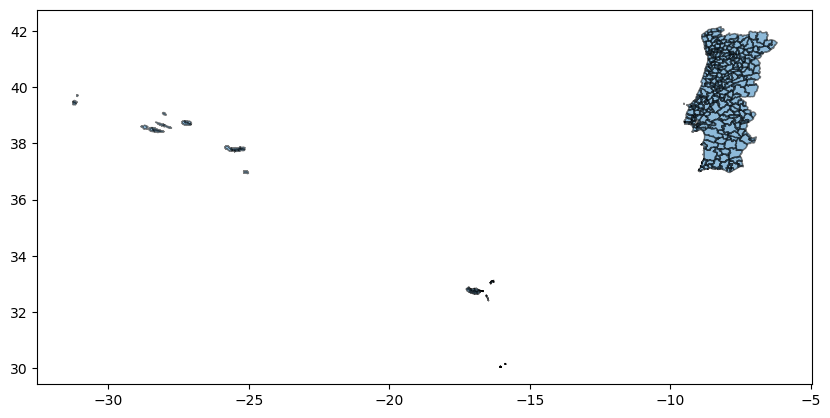

In [7]:
ax=concelhos.plot(figsize=(10,10), alpha= 0.5, edgecolor = "k")

# Autoconsumo

In [8]:
#dfA1 = pd.read_csv(r'data/Autoconsumo/8-unidades-de-producao-para-autoconsumo.csv', delimiter=';')
dfA1 = pd.read_parquet('data\Autoconsumo\8-unidades-de-producao-para-autoconsumo.parquet')
dfA2 = pd.read_csv(r'data\Autoconsumo\16-pedidos-concluidos-plrs.csv', delimiter = ';')

dfA3 = pd.read_csv(r'data\Autoconsumo\26-centrais.csv', delimiter=';')

dfA11 = pd.read_csv(r'data\Autoconsumo\total-de-unidades-de-producao-para-autoconsumo-auxiliar.csv', delimiter=';')

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\magda\AppData\Local\Temp\ipykernel_2972\1898159327.py:2: SyntaxWarning: invalid escape sequence '\A'
  dfA1 = pd.read_parquet('data\Autoconsumo\8-unidades-de-producao-para-autoconsumo.parquet')


## A1 - Total de unidades de produção

In [9]:
dfA1.shape

(75808, 10)

In [10]:
dfA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75808 entries, 0 to 75807
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   trimestre                         75808 non-null  object 
 1   distrito                          75808 non-null  object 
 2   concelho                          75808 non-null  object 
 3   freguesias                        75808 non-null  object 
 4   escalao_de_potencia_instalada     75808 non-null  object 
 5   numero_de_instalacoes             75808 non-null  int64  
 6   potencia_total_instalada_upac_kw  75808 non-null  float64
 7   coddistrito                       75808 non-null  object 
 8   coddistritoconcelho               75808 non-null  object 
 9   coddistritoconcelhofreguesia      75808 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.8+ MB


In [11]:
dfA1.isnull().sum()

trimestre                           0
distrito                            0
concelho                            0
freguesias                          0
escalao_de_potencia_instalada       0
numero_de_instalacoes               0
potencia_total_instalada_upac_kw    0
coddistrito                         0
coddistritoconcelho                 0
coddistritoconcelhofreguesia        0
dtype: int64

In [15]:
gdfA1=concelhos_pq.merge(dfA1, left_on='con_code', right_on='coddistritoconcelho')


In [16]:
gdfA1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 75808 entries, 0 to 75807
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   geo_point_2d                      75808 non-null  geometry
 1   geo_shape                         75808 non-null  geometry
 2   year                              75808 non-null  object  
 3   dis_code                          75808 non-null  object  
 4   dis_name                          75808 non-null  object  
 5   con_code                          75808 non-null  object  
 6   con_name                          75808 non-null  object  
 7   con_name_upper                    75808 non-null  object  
 8   con_name_lower                    75808 non-null  object  
 9   con_area_code                     75808 non-null  object  
 10  con_type                          75808 non-null  object  
 11  trimestre                         75808 non-nu

<Axes: >

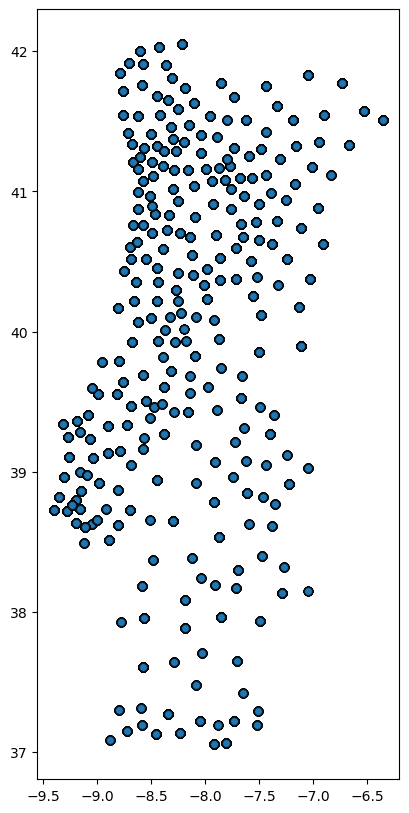

In [17]:
gdfA1.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

### A1.1 Total de unidades de produção para autoconsumo 

In [ ]:
dfA11.shape

(75808, 14)

In [ ]:
dfA11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75808 entries, 0 to 75807
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Concelho                        75808 non-null  object 
 1   Quarter                         75808 non-null  object 
 2   Installed power range (kW)      75808 non-null  object 
 3   Number of installations         75808 non-null  int64  
 4   Total installed power (kW)      75808 non-null  float64
 5   CPEs (#)                        75808 non-null  float64
 6   relacao_instalacoes_por_cpe     75808 non-null  float64
 7   relacao_potencia_por_cpe        75808 non-null  float64
 8   District                        75808 non-null  object 
 9   Parishes                        75808 non-null  object 
 10  DistrictCode                    75808 non-null  int64  
 11  DistrictMunicipalityCode        75808 non-null  int64  
 12  DistrictMunicipalityParishCode  

## A2:  Novas unidades de produção para Autoconsumo

In [ ]:
dfA2.shape

(2508, 6)

In [ ]:
dfA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ano                                       2508 non-null   int64  
 1   Semestre                                  2508 non-null   int64  
 2   data semestre                             2508 non-null   object 
 3   Concelho                                  2502 non-null   object 
 4   Pedidos de Ligação à Rede Executados (#)  2508 non-null   float64
 5   CodConcelho                               2502 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 117.7+ KB


In [ ]:
dfA2.isnull().sum()

Ano                                         0
Semestre                                    0
data semestre                               0
Concelho                                    6
Pedidos de Ligação à Rede Executados (#)    0
CodConcelho                                 6
dtype: int64

## A3: Ligações à rede

In [ ]:
dfA3.shape

(2223, 6)

In [ ]:
dfA3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ano                       2223 non-null   int64  
 1   Semestre                  2223 non-null   int64  
 2   Concelho                  2223 non-null   object 
 3   Potência de Ligação (kW)  2223 non-null   float64
 4   Processos Concluídos (#)  2223 non-null   float64
 5   CodConcelho               2223 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 104.3+ KB


In [ ]:
dfA3.isnull().sum()

Ano                         0
Semestre                    0
Concelho                    0
Potência de Ligação (kW)    0
Processos Concluídos (#)    0
CodConcelho                 0
dtype: int64

# Energias Renováveis

In [ ]:
dfE1 = pd.read_csv(r'data/Energias_renovaveis/energia-injetada-na-rede-de-distribuicao.csv', delimiter=';')

dfE2 = pd.read_csv(r'data/Energias_renovaveis/energia-produzida-total-nacional.csv', delimiter=';')

## E1: Energia Injetada na Rede de Distribuição

In [ ]:
dfE1.shape

(78057, 12)

In [ ]:
dfE1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78057 entries, 0 to 78056
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Data/Hora                 78057 non-null  object 
 1   Dia                       78057 non-null  int64  
 2   Mês                       78057 non-null  int64  
 3   Ano                       78057 non-null  int64  
 4   Data                      78057 non-null  object 
 5   Hora                      78057 non-null  object 
 6   Cogeração (kWh)           78057 non-null  float64
 7   Eólica (kWh)              78057 non-null  float64
 8   Fotovoltaica (kWh)        78057 non-null  float64
 9   Hídrica (kWh)             78057 non-null  float64
 10  Outras Tecnologias (kWh)  78057 non-null  float64
 11  Rede Distribuição (kWh)   78057 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 7.1+ MB


In [ ]:
dfE1.isnull().sum()

Data/Hora                   0
Dia                         0
Mês                         0
Ano                         0
Data                        0
Hora                        0
Cogeração (kWh)             0
Eólica (kWh)                0
Fotovoltaica (kWh)          0
Hídrica (kWh)               0
Outras Tecnologias (kWh)    0
Rede Distribuição (kWh)     0
dtype: int64

## E2: Energia Produzida Total Nacional

In [ ]:
dfE2.shape

(78057, 9)

In [ ]:
dfE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78057 entries, 0 to 78056
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data/Hora              78057 non-null  object 
 1   Dia                    78057 non-null  int64  
 2   Mês                    78057 non-null  int64  
 3   Ano                    78057 non-null  int64  
 4   Data                   78057 non-null  object 
 5   Hora                   78057 non-null  object 
 6   Mercado (kWh)          78057 non-null  float64
 7   Regime Especial (kWh)  78057 non-null  float64
 8   Total (kWh)            78057 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 5.4+ MB


In [ ]:
dfE2.isnull().sum()

Data/Hora                0
Dia                      0
Mês                      0
Ano                      0
Data                     0
Hora                     0
Mercado (kWh)            0
Regime Especial (kWh)    0
Total (kWh)              0
dtype: int64

# Iluminação Pública

In [ ]:
dfI1 = pd.read_csv(r'data/Iluminacao_publica/cadastro_iluminacao_publica.csv', delimiter=';')

dfI2 = pd.read_csv(r'data/Iluminacao_publica/20-caracterizacao-pes-contrato-ativo.csv', delimiter=';')

## I1 - Caracterização de luminárias de Iluminação Pública

In [ ]:
dfI1.shape

(9434, 11)

In [ ]:
dfI1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9434 entries, 0 to 9433
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           9434 non-null   int64  
 1   mes                           9434 non-null   int64  
 2   Distrito                      9434 non-null   object 
 3   Concelho                      9434 non-null   object 
 4   Freguesia                     9434 non-null   object 
 5   tipo_de_lampada               9434 non-null   object 
 6   luminarias                    9434 non-null   float64
 7   potencia instalada total (W)  8419 non-null   float64
 8   CodDistrito                   9434 non-null   int64  
 9   CodDistritoConcelho           9434 non-null   int64  
 10  coddistritoconcelhofreguesia  9434 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 810.9+ KB


In [ ]:
dfI1.isnull().sum()

ano                                0
mes                                0
Distrito                           0
Concelho                           0
Freguesia                          0
tipo_de_lampada                    0
luminarias                         0
potencia instalada total (W)    1015
CodDistrito                        0
CodDistritoConcelho                0
coddistritoconcelhofreguesia       0
dtype: int64

In [ ]:
#Dataframe: registos de iluminação pública
dfI1.columns

Index(['ano', 'mes', 'Distrito', 'Concelho', 'Freguesia', 'tipo_de_lampada',
       'luminarias', 'potencia instalada total (W)', 'CodDistrito',
       'CodDistritoConcelho', 'coddistritoconcelhofreguesia'],
      dtype='object')

In [ ]:
# Tipos de lampada
dfI1['tipo_de_lampada'].unique()

array(['Sódio', 'Outros/Não definido', 'LED', 'Mercúrio',
       'Iodeto Metálico', 'Indução', 'Fluorescente'], dtype=object)

In [ ]:
dfI1['ano'].unique()

array([2025])

In [ ]:
#Concatenar ano e mes
dfI1['Data']=(dfI1['ano'].astype(str) 
                + '-' 
                + dfI1['mes'].astype(str))

dfI1['Data']

0       2025-3
1       2025-3
2       2025-3
3       2025-3
4       2025-3
         ...  
9429    2025-3
9430    2025-3
9431    2025-3
9432    2025-3
9433    2025-3
Name: Data, Length: 9434, dtype: object

In [ ]:
dfI1['Data'].unique()

array(['2025-3'], dtype=object)

## I2 - Caracterização de CPEs com contratos ativos

In [ ]:
dfI2.shape

(598165, 12)

In [ ]:
dfI2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598165 entries, 0 to 598164
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Ano                           598165 non-null  int64 
 1   mes                           598165 non-null  int64 
 2   Data                          598165 non-null  object
 3   Distrito                      598165 non-null  object
 4   Concelho                      598165 non-null  object
 5   Freguesia                     598165 non-null  object
 6   tipo_de_instalacao            598165 non-null  object
 7   nivel_de_tensao               598165 non-null  object
 8   cpes                          598165 non-null  int64 
 9   CodDistrito                   598165 non-null  int64 
 10  CodDistritoConcelho           598165 non-null  int64 
 11  coddistritoconcelhofreguesia  598165 non-null  object
dtypes: int64(5), object(7)
memory usage: 54.8+ MB


In [ ]:
dfI2.isnull().sum()

Ano                             0
mes                             0
Data                            0
Distrito                        0
Concelho                        0
Freguesia                       0
tipo_de_instalacao              0
nivel_de_tensao                 0
cpes                            0
CodDistrito                     0
CodDistritoConcelho             0
coddistritoconcelhofreguesia    0
dtype: int64

In [ ]:
dfI2['tipo_de_instalacao'].unique()

array(['Outros', 'Não Doméstico', 'Doméstico', 'Iluminação Pública'],
      dtype=object)

In [ ]:
dfI2['Data'].unique()


array(['2022-08', '2024-12', '2024-02', '2022-05', '2022-01', '2024-11',
       '2024-05', '2024-08', '2024-06', '2024-10', '2022-10', '2022-06',
       '2023-06', '2023-05', '2023-02', '2023-03', '2024-07', '2022-03',
       '2023-07', '2024-01', '2023-01', '2025-01', '2022-12', '2024-09',
       '2023-04', '2022-04', '2025-02', '2023-11', '2022-09', '2024-04',
       '2023-08', '2022-11', '2023-12', '2023-09', '2022-07', '2022-02',
       '2024-03', '2023-10'], dtype=object)

In [ ]:
dfI2 = dfI2.sort_values(by='Data')

dfI2.head(5)

,Ano,mes,Data,Distrito,Concelho,Freguesia,tipo_de_instalacao,nivel_de_tensao,cpes,CodDistrito,CodDistritoConcelho,coddistritoconcelhofreguesia
227902,2022,1,2022-01,Santarém,Torres Novas,"Torres Novas (São Pedro), Lapas e Ribeira Branca",Não Doméstico,Baixa Tensão Normal,831,14,1419,141921
305436,2022,1,2022-01,Santarém,Alcanena,Serra de Santo António,Doméstico,Baixa Tensão Normal,394,14,1402,140209
305437,2022,1,2022-01,Viseu,Moimenta da Beira,"Pêra Velha, Aldeia de Nacomba e Ariz",Iluminação Pública,Baixa Tensão Normal,5,18,1807,180722
305438,2022,1,2022-01,Viseu,Armamar,Aldeias,Iluminação Pública,Baixa Tensão Normal,3,18,1801,180101
305439,2022,1,2022-01,Aveiro,Arouca,Fermedo,Não Doméstico,Baixa Tensão Normal,115,1,104,010411


# Contadores inteligentes

In [ ]:
dfC1=pd.read_csv(r'data\Contadores_inteligentes\21-contadores-de-energia.csv', delimiter=';')

dfC2=pd.read_csv(r'data/Contadores_inteligentes/23-leituras-recolhidas-remotamente.csv', delimiter=';')

## C1: Número de contratos de energia ativos por tipo de contador

In [ ]:
dfC1.shape

(187602, 12)

In [ ]:
dfC1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187602 entries, 0 to 187601
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Ano                          187602 non-null  int64 
 1   Mês                          187602 non-null  int64 
 2   Data                         187602 non-null  object
 3   Distrito                     187600 non-null  object
 4   Concelho                     187600 non-null  object
 5   Freguesia                    187600 non-null  object
 6   Inclui contador inteligente  187602 non-null  object
 7   Número de CPE's              187602 non-null  int64 
 8   Código Distrito              187602 non-null  int64 
 9   Código Concelho              187602 non-null  int64 
 10  Código Freguesia             187602 non-null  object
 11  Contrato Ativo               187602 non-null  object
dtypes: int64(5), object(7)
memory usage: 17.2+ MB


In [ ]:
dfC1.isnull().sum()

Ano                            0
Mês                            0
Data                           0
Distrito                       2
Concelho                       2
Freguesia                      2
Inclui contador inteligente    0
Número de CPE's                0
Código Distrito                0
Código Concelho                0
Código Freguesia               0
Contrato Ativo                 0
dtype: int64

## C2: Número de locais de consumo de baixa tensão com Leituras Remotas

In [ ]:
dfC2.shape

(74163, 10)

In [ ]:
# Dataframe C1: Contadores de energia
dfC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74163 entries, 0 to 74162
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ano                           74163 non-null  int64 
 1   Mes                           74163 non-null  int64 
 2   data                          74163 non-null  object
 3   Distrito                      74163 non-null  object
 4   Concelho                      74163 non-null  object
 5   Freguesia                     74163 non-null  object
 6   CPEs com Leituras (#)         74163 non-null  int64 
 7   CodDistrito                   74163 non-null  int64 
 8   CodDistritoConcelho           74163 non-null  int64 
 9   CodDistritoConcelhoFreguesia  74163 non-null  object
dtypes: int64(5), object(5)
memory usage: 5.7+ MB


In [ ]:
# Dataframe C2: Leituras recolhidas remotamente
dfC2.isnull().sum()

Ano                             0
Mes                             0
data                            0
Distrito                        0
Concelho                        0
Freguesia                       0
CPEs com Leituras (#)           0
CodDistrito                     0
CodDistritoConcelho             0
CodDistritoConcelhoFreguesia    0
dtype: int64

# Mobilidade Eléctrica

In [ ]:
dfM1 = pd.read_csv(r'data/Mobilidade_eletrica/9-plr-mobilidade-eletrica.csv',delimiter=';')

dfM2 = pd.read_csv(r'data\Mobilidade_eletrica\22-diagrama-de-carga-por-instalacao.csv',delimiter=';')

dfM3 = pd.read_csv(r'data/Mobilidade_eletrica/postos_carregamento_ves.csv',delimiter=';')

## M1: Novas ligações à rede associados à mobilidade elétrica

In [ ]:
#Dataframe M1: Pedidos de ligação

dfM1.shape

(619, 5)

In [ ]:
dfM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ano                                       619 non-null    int64  
 1   Semestre                                  619 non-null    int64  
 2   Concelho                                  619 non-null    object 
 3   Pedidos de Ligação à Rede Executados (#)  619 non-null    float64
 4   CodConcelho                               619 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
dfM1.isnull().sum()

Ano                                         0
Semestre                                    0
Concelho                                    0
Pedidos de Ligação à Rede Executados (#)    0
CodConcelho                                 0
dtype: int64

## M2: Número de locais de consumo de baixa tensão com recolha de Diagramas de Carga

In [ ]:
#Dataframe M2: Diagrama de carga por instalação

dfM2.shape

(71505, 11)

In [ ]:
dfM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71505 entries, 0 to 71504
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ano                           71505 non-null  int64 
 1   Mês                           71505 non-null  int64 
 2   data                          71505 non-null  object
 3   Distrito                      71505 non-null  object
 4   Concelho                      71505 non-null  object
 5   Freguesia                     71505 non-null  object
 6   Inclui Mobilidade Elétrica    71505 non-null  object
 7   CPEs com DCs Recolhidos (#)   71505 non-null  int64 
 8   CodDistrito                   71505 non-null  int64 
 9   CodDistritoConcelho           71505 non-null  int64 
 10  CodDistritoConcelhoFreguesia  71505 non-null  object
dtypes: int64(5), object(6)
memory usage: 6.0+ MB


In [ ]:
dfM3.isnull().sum()

Trimestre                                     0
Distrito                                      0
Concelho                                      0
Freguesia                                     0
Potência Máxima Admissível (kW)               0
Pontos de ligação para instalações de PCVE    0
CodDistrito                                   0
CodDistritoConcelho                           0
CodDistritoConcelhoFreguesia                  0
dtype: int64

## M3: Pontos de ligação para postos de Carregamento de Veículos Elétricos

In [ ]:
#Datafram M3: Postos de carregamento de VE

dfM3.shape

(26716, 9)

In [ ]:
dfM3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26716 entries, 0 to 26715
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Trimestre                                   26716 non-null  object 
 1   Distrito                                    26716 non-null  object 
 2   Concelho                                    26716 non-null  object 
 3   Freguesia                                   26716 non-null  object 
 4   Potência Máxima Admissível (kW)             26716 non-null  float64
 5   Pontos de ligação para instalações de PCVE  26716 non-null  int64  
 6   CodDistrito                                 26716 non-null  int64  
 7   CodDistritoConcelho                         26716 non-null  int64  
 8   CodDistritoConcelhoFreguesia                26716 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


In [ ]:
dfM3.isnull().sum()

Trimestre                                     0
Distrito                                      0
Concelho                                      0
Freguesia                                     0
Potência Máxima Admissível (kW)               0
Pontos de ligação para instalações de PCVE    0
CodDistrito                                   0
CodDistritoConcelho                           0
CodDistritoConcelhoFreguesia                  0
dtype: int64